# Neural Network (nn)

[Edward Lu](https://github.com/edwardlu71/notebooks)

### Example: Linear Regression for curve

#### Supervised Learning
the machine learning task of learning a function that maps an input to a desired output based on example input-output pairs.

1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediction, i.e. only linear layer with activation 
    $$ y_{j} = \sum{w_{ij} * x_{i}}, L = \sigma(\sum{y_{j}}) $$
    - backward pass: gradients
    $$ \frac{\partial L}{\partial \vec{x}} = \frac{\partial L}{\partial \vec{y}} . \frac{\partial \vec{y}}{\partial \vec{x}} $$
    - update weight
    
Be aware everything is tensor

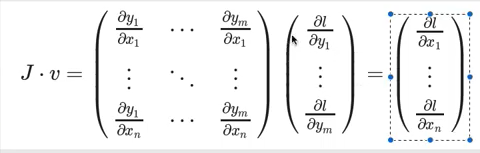


#### forward and backward propagation

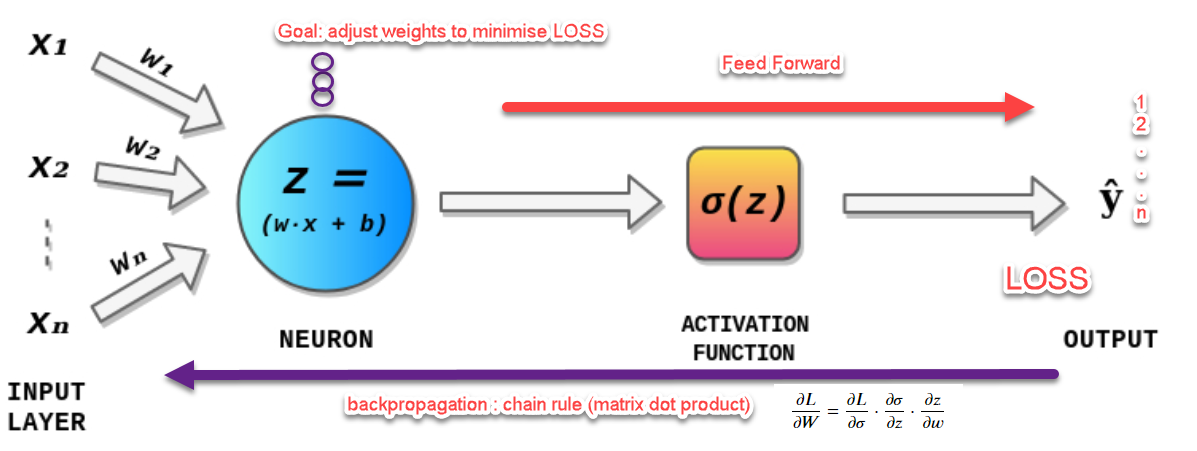


$$ \frac{\partial L}{\partial W} = \frac{\partial L}{\partial \sigma} \cdot \frac{\partial \sigma }{\partial z} \cdot \frac{\partial z}{\partial w} $$

## Generation of sample data

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 0) prepare data
# Be aware of data shapes: X_numpy is vertical arrary of arries with one element; y_numpy is horizental array
X_numpy, y_numpy, coef = datasets.make_regression(n_samples=100, #number of samples
                                                  n_features=1, #number of features
                                                  n_informative=1, #number of useful features
                                                  noise=20, #bias and standard deviation of the guassian noise
                                                  coef=True, #true coefficient used to generated the data
                                                  random_state=1)

Text(0.5, 1.0, 'samples and traditional linear regression')

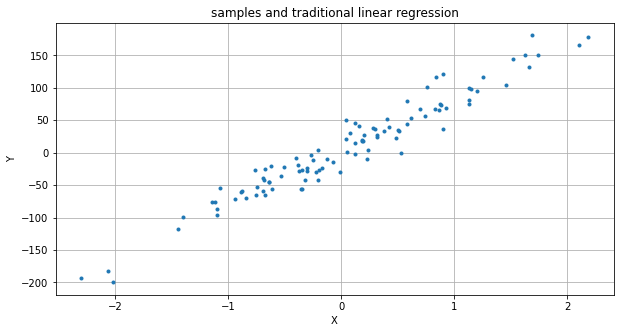

In [3]:
# convert X_numpy to horizental array
x_numpy = X_numpy.T[0]

# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(X_numpy, y_numpy,'.',label='training data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples and traditional linear regression')

## 3. Use neural network to do curve regression

- better than the math of linear regression, right? :)
- with model
- only one hidden layer with activation

Text(0.5, 1.0, 'samples for curve regression')

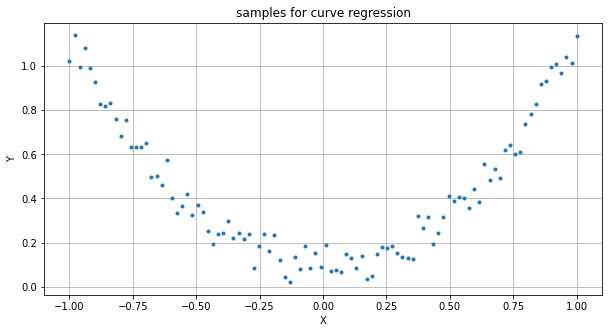

In [4]:
import torch
import torch.nn as nn

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())             # noisy y data (tensor), shape=(100, 1)
#y = torch.erf(x) + 0.3*torch.rand(x.size())             # noisy y data (tensor), shape=(100, 1)

# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(x.data.numpy(), y.data.numpy(),'.',label='training data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples for curve regression')

In [5]:
class NeuralNet2(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(NeuralNet2, self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden)   # hidden layer
        self.relu = nn.ReLU()                          # activation
        self.predict = nn.Linear(n_hidden, n_output)   # output layer, also called full connection layer

    def forward(self, x):
        out = self.hidden(x)
        out = self.relu(out)
        out = self.predict(out)                        # linear output
        return out
    
model = NeuralNet2(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(model)  # net architecture    

NeuralNet2(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [8]:
loss_func = nn.MSELoss()  # this is for regression mean squared loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

num_epochs = 500
for epoch in range(num_epochs):
    prediction = model(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

Text(0.5, 1.0, 'samples for curve regression and result from NN')

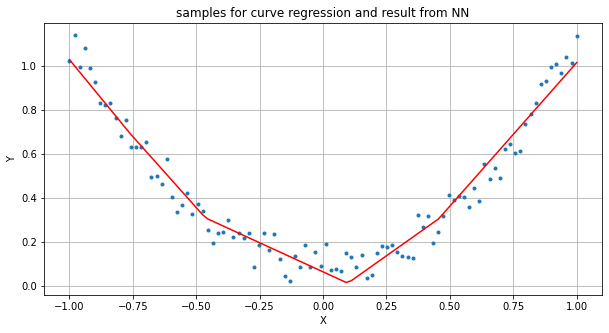

In [9]:
# plot the data and linear regression result
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.ion() #interactive plot on
plt.grid(True)
plt.plot(x.data.numpy(), y.data.numpy(),'.',label='training data')
plt.plot(x.data.numpy(), prediction.data.numpy(), "r")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('samples for curve regression and result from NN')